In [1]:
import ee
from IPython.display import Image

# import openet.core
import openet.core.common as common

In [2]:
ee.Initialize()

In [3]:
ndvi_palette = ['#EFE7E1', '#003300']
et_palette = [
    'DEC29B', 'E6CDA1', 'EDD9A6', 'F5E4A9', 'FFF4AD', 'C3E683', '6BCC5C', 
    '3BB369', '20998F', '1C8691', '16678A', '114982', '0B2C7A']
viridis_palette = ['440154', '433982', '30678D', '218F8B', '36B677', '8ED542', 'FDE725']

image_size = 768

In [4]:
soil_emis_coll_id = 'projects/earthengine-legacy/assets/projects/openet/soil_emissivity/tiles'
soil_emis_coll = ee.ImageCollection(soil_emis_coll_id)

In [5]:
landsat_id = 'LC08_030036_20210725'
landsat_img = ee.Image('LANDSAT/LC08/C02/T1_L2/{}'.format(landsat_id))

In [11]:
xy = [-102.266679, 34.368470]
dx = 0.03
dy = 0.015
study_area = ee.Geometry.Rectangle(xy[0]-dx, xy[1]-dy, xy[0]+dx, xy[1]+dy)
study_region = study_area.bounds(1, 'EPSG:4326').coordinates().getInfo()

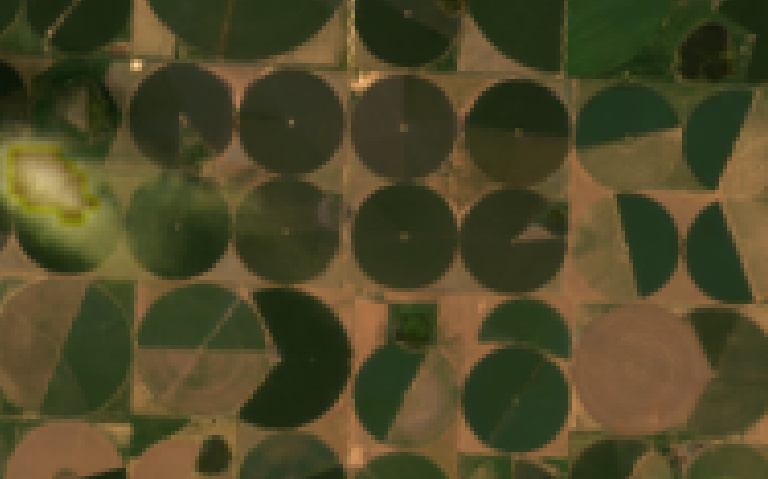

In [12]:
true_color_img = landsat_img.select(['SR_B4', 'SR_B3', 'SR_B2']).multiply(0.0000275).add(-0.2)
Image(url=true_color_img.getThumbURL({'min': 0.0, 'max': 0.3, 'region': study_region, 
                                      'dimensions': image_size}), 
      embed=True, format='png')


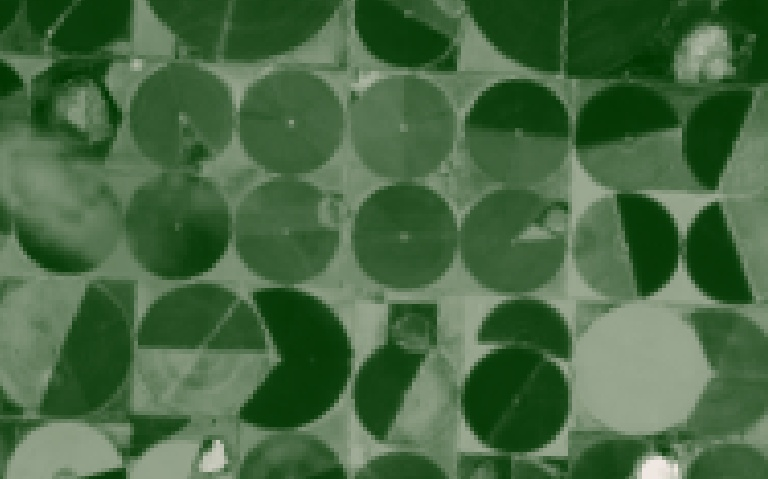

In [13]:
ndvi_img = landsat_img.multiply(0.0000275).add(-0.2).normalizedDifference(['SR_B5', 'SR_B4'])
Image(url=ndvi_img.getThumbURL({'min': -0.1, 'max': 0.9, 'palette': ndvi_palette, 
                                'region': study_region, 'dimensions': image_size}), 
      embed=True, format='png')


### Raw LST

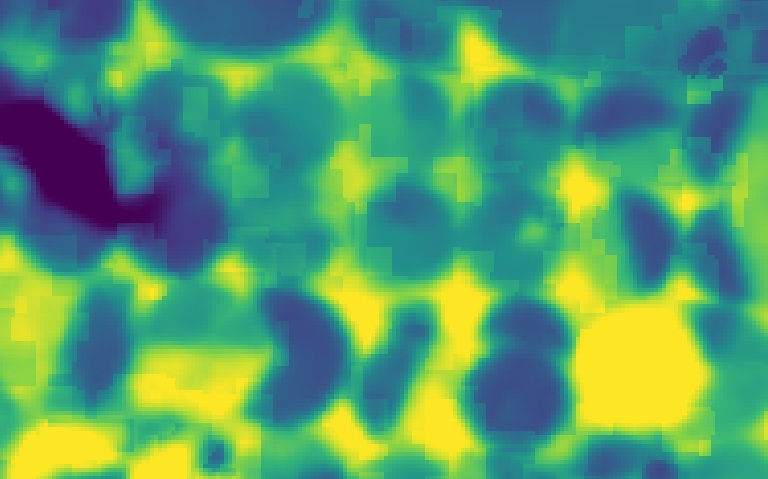

In [14]:
lst_img = landsat_img.select(['ST_B10']).multiply(0.00341802).add(149.0)
Image(url=lst_img.getThumbURL({'min': 300, 'max': 320, 'palette': viridis_palette, 
                               'region': study_region, 'dimensions': image_size}), 
      embed=True, format='png')


### Corrected LST

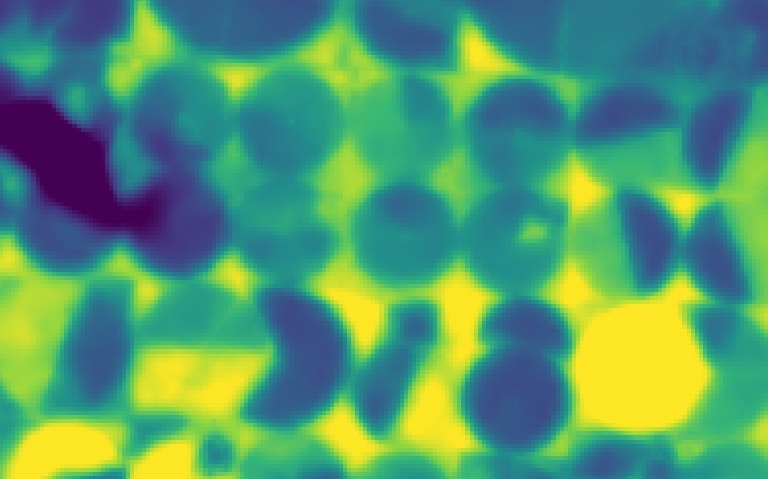

In [15]:
lst_img = common.landsat_c2_sr_lst_correct(landsat_img, ndvi_img, soil_emis_coll_id)
Image(url=lst_img.getThumbURL({'min': 300, 'max': 320, 'palette': viridis_palette, 
                               'region': study_region, 'dimensions': image_size}), 
      embed=True, format='png')
